## Steel Fault Classification

This dataset comes from research by Semeion, Research Center of Sciences of Communication. The original aim of the research was to correctly classify the type of surface defects in stainless steel plates, with six types of possible defects (plus "other"). The Input vector was made up of 27 indicators that approximately [describe] the geometric shape of the defect and its outline. According to the research paper, Semeion was commissioned by the Centro Sviluppo Materiali (Italy) for this task and therefore it is not possible to provide details on the nature of the 27 indicators used as
Input vectors or the types of the 6 classes of defects.
In this notebook we are going to create a model to classify defective vs non-defective steel plates. Fist we will standardized data to feed into stand alone model(Logistic Regression, Random Forest Classifier), then we will create pricipal components and use them instead of original feature. The performance of two models will be compared. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

In [155]:
df=pd.read_csv('steel_fault.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1


In [156]:
rows,columns=df.shape
print(f"There are {rows} rows and {columns} columns in this dataset.")

There are 1941 rows and 34 columns in this dataset.


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

In [158]:
print("There are no missing values and all data is of numerical type.")

There are no missing values and all data is of numerical type.


In [159]:
df.nunique()

V1        962
V2        994
V3       1939
V4       1940
V5        920
V6        399
V7        317
V8       1909
V9        161
V10       100
V11        84
V12         2
V13         2
V14        24
V15      1387
V16      1338
V17       770
V18       454
V19       818
V20       648
V21         3
V22       914
V23       183
V24       217
V25       918
V26      1522
V27       388
V28         2
V29         2
V30         2
V31         2
V32         2
V33         2
Class       2
dtype: int64

In [160]:
print("We drop columns V3 and V4 as almost all entries are unique. So it won't be useful for analysis. ")

We drop columns V3 and V4 as almost all entries are unique. So it won't be useful for analysis. 


In [161]:
df=df.drop(['V3','V4'],axis=1)

In [162]:
df['Class']=df['Class'].replace({1:0,2:1})

In [163]:
df.describe()

,V1,V2,V5,V6,V7,V8,V9,V10,V11,V12,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


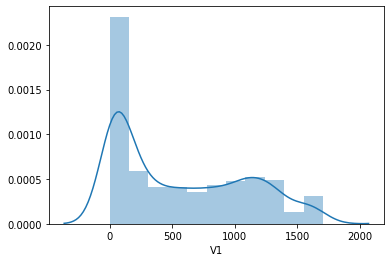

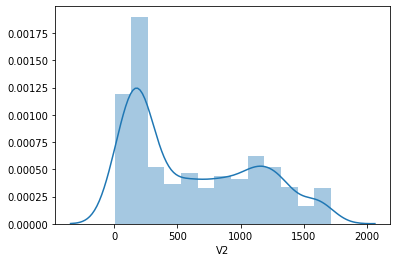

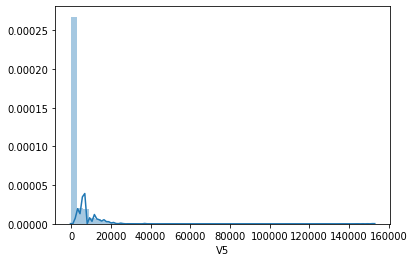

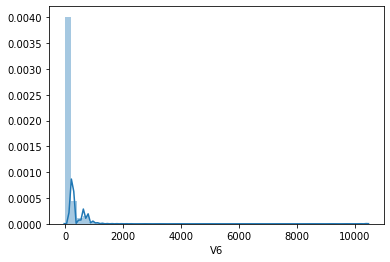

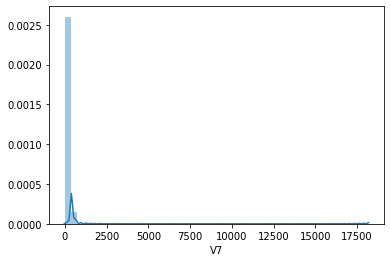

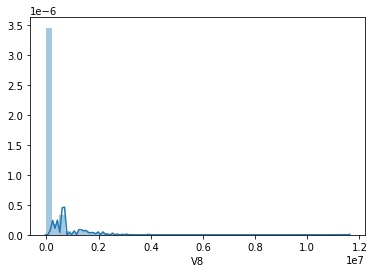

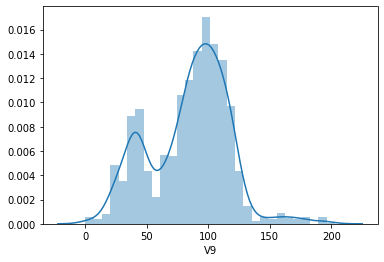

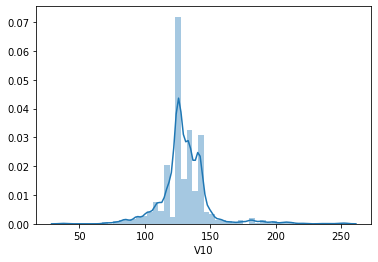

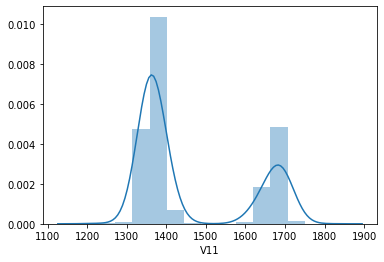

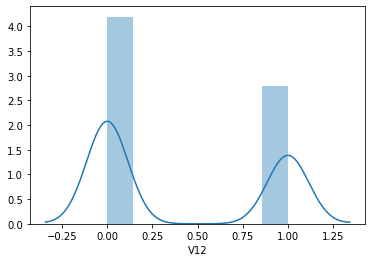

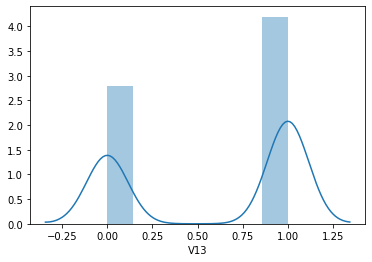

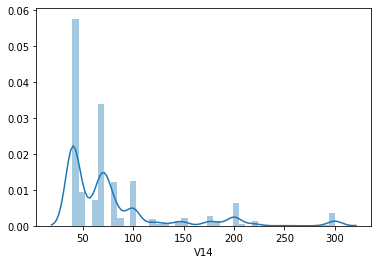

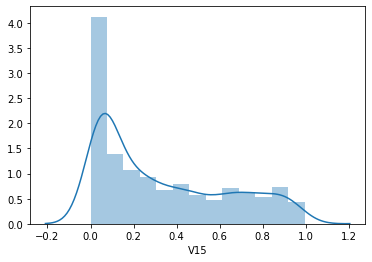

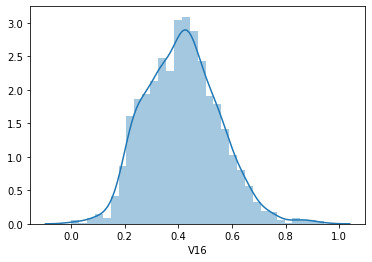

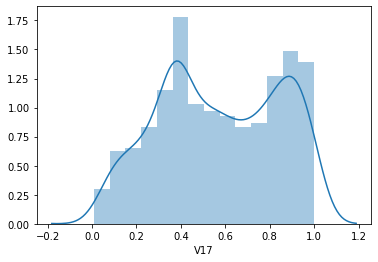

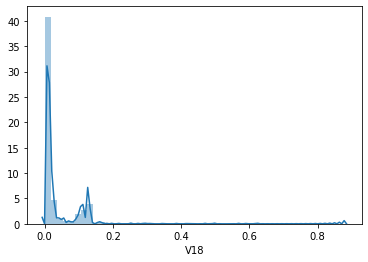

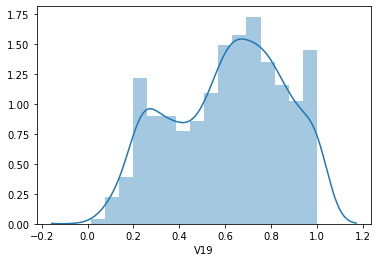

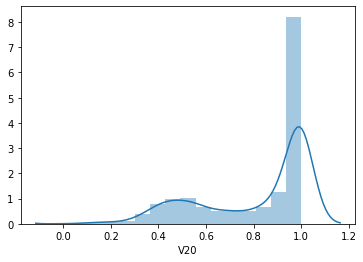

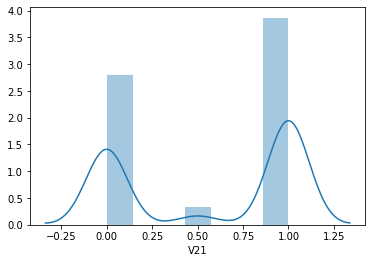

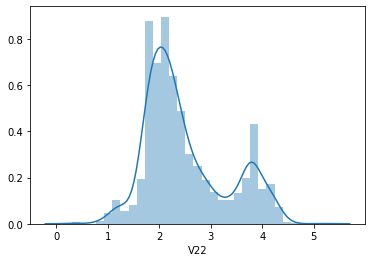

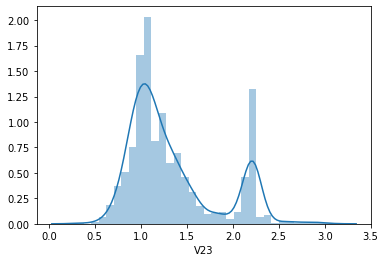

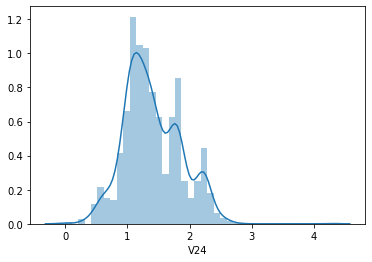

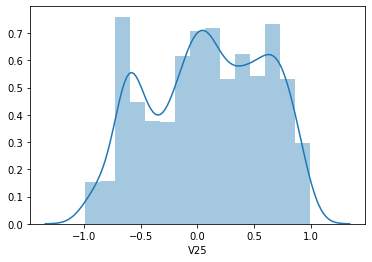

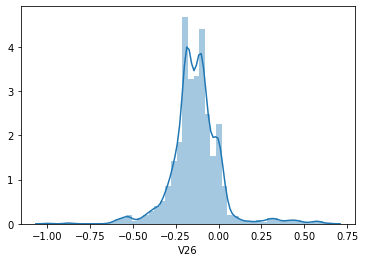

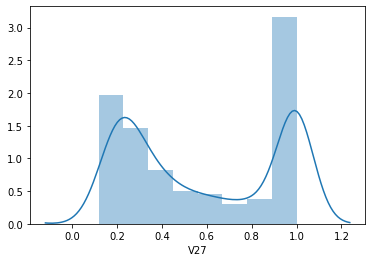

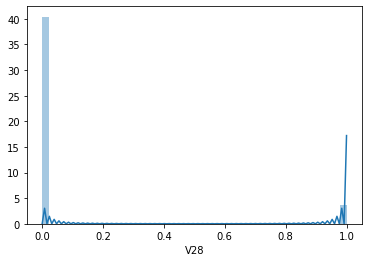

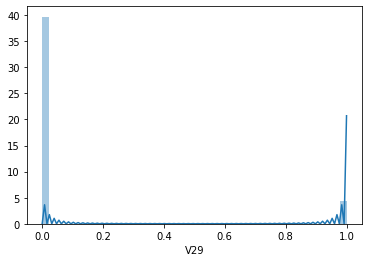

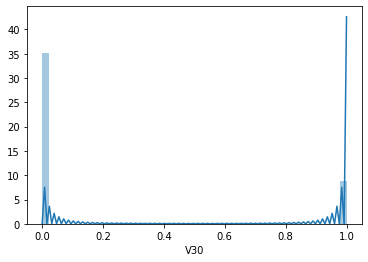

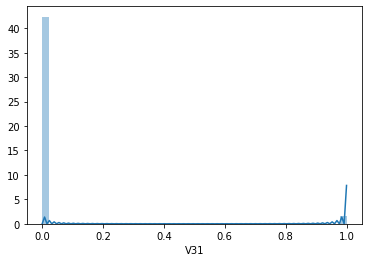

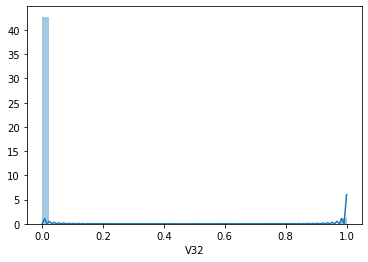

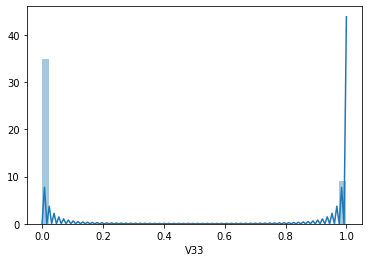

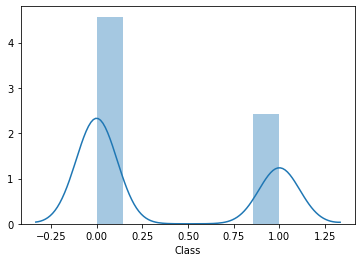

In [164]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [165]:
print('From the statistical description and distribution plots we observe that most features are not normally distributed.')

From the statistical description and distribution plots we observe that most features are not normally distributed.


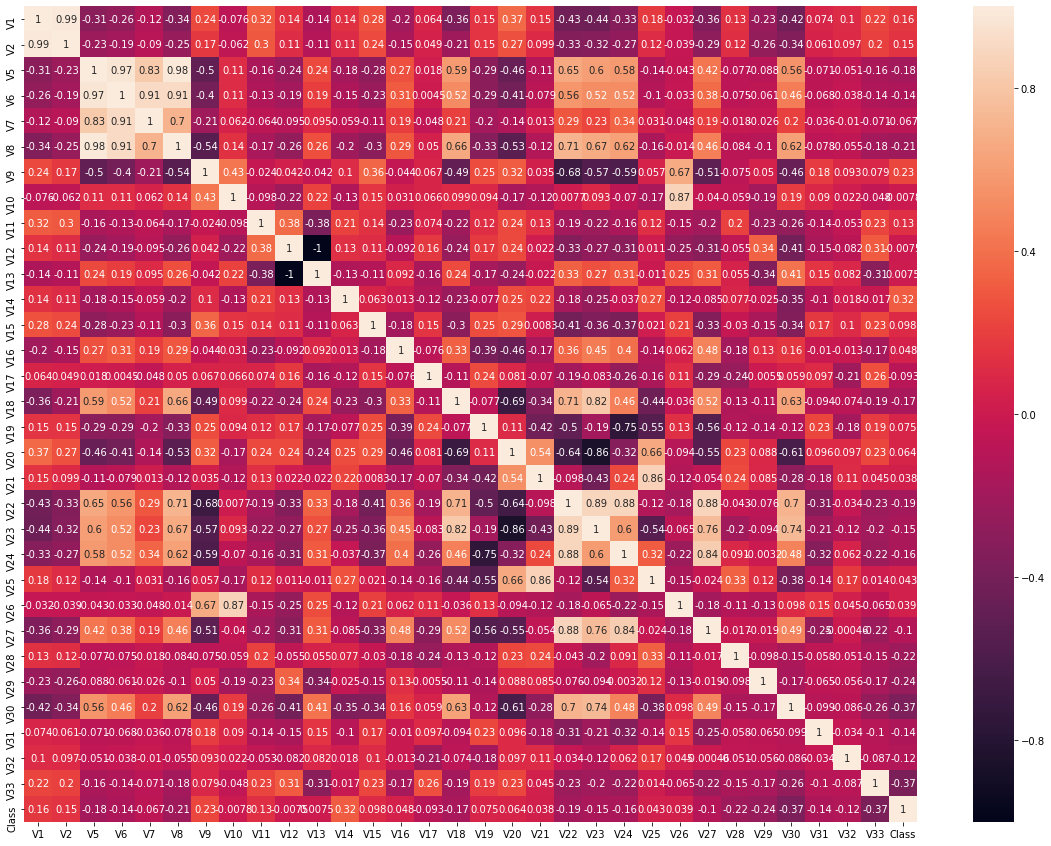

In [166]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [167]:
df.corr()

,V1,V2,V5,V6,V7,V8,V9,V10,V11,V12,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
V1,1.000000,0.988314,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,0.316662,0.144319,...,0.178585,-0.031578,-0.355251,0.134956,-0.228960,-0.419264,0.073740,0.103924,0.221296,0.164804
V2,0.988314,1.000000,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,0.299390,0.112009,...,0.115019,-0.038996,-0.286736,0.119814,-0.258178,-0.336084,0.061471,0.096523,0.201704,0.145783
V5,-0.307322,-0.225399,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,-0.155853,-0.235591,...,-0.137604,-0.043449,0.422947,-0.076752,-0.088440,0.556846,-0.071182,-0.050578,-0.163739,-0.184632
V6,-0.258937,-0.186326,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,-0.134240,-0.189250,...,-0.101731,-0.032617,0.380605,-0.075418,-0.060582,0.455003,-0.067547,-0.037820,-0.140197,-0.142903
V7,-0.118757,-0.090138,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,-0.063825,-0.095154,...,0.031381,-0.047778,0.191772,-0.017616,-0.025721,0.203063,-0.035743,-0.010058,-0.070989,-0.066801
V8,-0.339045,-0.247052,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,-0.169331,-0.263632,...,-0.158483,-0.014067,0.464248,-0.084307,-0.099592,0.616950,-0.078111,-0.055272,-0.179831,-0.205890
V9,0.237637,0.168649,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,-0.023579,0.042048,...,0.057123,0.669534,-0.514797,-0.074697,0.049905,-0.461000,0.183327,0.092765,0.078690,0.228112
V10,-0.075554,-0.062392,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,-0.098009,-0.216339,...,-0.169747,0.870160,-0.039651,-0.058742,-0.189441,0.185897,0.090456,0.022157,-0.047549,-0.007784
V11,0.316662,0.299390,-0.155853,-0.134240,-0.063825,-0.169331,-0.023579,-0.098009,1.000000,0.378542,...,0.120715,-0.149769,-0.197543,0.196209,-0.230856,-0.261071,-0.136839,-0.052603,0.225504,0.132091
V12,0.144319,0.112009,-0.235591,-0.189250,-0.095154,-0.263632,0.042048,-0.216339,0.378542,1.000000,...,0.010630,-0.252818,-0.308910,-0.054792,0.339488,-0.407730,-0.154796,-0.082489,0.306385,-0.007530


In [168]:
print('V1 and V2 are strongly correlated with each other.So we will retain just one of them.')

V1 and V2 are strongly correlated with each other.So we will retain just one of them.


In [169]:
df=df.drop('V2', axis=1)

In [170]:
#Standardising the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=df.drop('Class',axis=1)
y=df.Class
X_std=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X_std.head()

,V1,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
0,-1.016481,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,1.576303,1.223956,-1.223956,...,0.528872,1.467656,-1.075752,-0.009490,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
1,0.141894,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,1.576303,1.223956,-1.223956,...,0.130174,1.417530,-0.297824,-0.845759,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
2,0.495362,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,1.133521,1.223956,-1.223956,...,-0.325764,1.165103,0.057185,-1.091513,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
3,0.541467,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,-0.734467,-0.817023,0.817023,...,0.550227,1.519978,-0.171419,-0.189237,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
4,1.379032,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,-0.734467,-0.817023,0.817023,...,2.216130,1.698514,-0.456503,1.221636,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086


### Classification using a linear model

In [188]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_std,y)

LogisticRegression()

In [189]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [190]:
y_pred=lg.predict(X_std)

In [191]:
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

1.0
[[1268    0]
 [   0  673]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00       673

    accuracy                           1.00      1941
   macro avg       1.00      1.00      1.00      1941
weighted avg       1.00      1.00      1.00      1941



In [192]:
print(roc_auc_score(y,y_pred))

1.0


In [193]:
print("Linear model can precisely classify all records in the data with 100% accuracy.")

Linear model can precisely classify all records in the data with 100% accuracy.


### Classification using Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)


In [178]:
#Hyperparameter tuning using Random Search CV.
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
param_dist={'n_estimators':sp_randint(50,250),'criterion':['entropy','gini'],'max_depth':sp_randint(2,25),'min_samples_split':sp_randint(2,50), 'min_samples_leaf':sp_randint(1,50)}
rsearch=RandomizedSearchCV(rfc,param_distributions=param_dist,cv=5,n_iter=50,scoring='roc_auc',random_state=42)
rsearch.fit(X_std,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BA9FF4F7C8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BAA1D68C08>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BAA2346988>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BA9FBCA908>},
                   random_state=42, scoring='roc_auc')

In [179]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 8,
 'min_samples_split': 48,
 'n_estimators': 84}

In [180]:
pd.DataFrame(rsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.558895,0.024305,0.025293,0.002134,entropy,21,29,16,156,"{'criterion': 'entropy', 'max_depth': 21, 'min...",0.670400,0.980638,0.988042,0.871878,0.999414,0.902074,0.124598,19
1,0.352657,0.027393,0.027538,0.013751,gini,22,39,20,124,"{'criterion': 'gini', 'max_depth': 22, 'min_sa...",0.672324,0.936538,0.837525,0.856126,0.982287,0.856960,0.106309,40
2,0.722571,0.088411,0.028988,0.001213,entropy,22,36,41,201,"{'criterion': 'entropy', 'max_depth': 22, 'min...",0.681248,0.967799,0.951316,0.866696,0.998653,0.893142,0.114620,28
3,0.940410,0.102314,0.035762,0.011052,entropy,23,2,25,207,"{'criterion': 'entropy', 'max_depth': 23, 'min...",0.681627,0.997532,0.999265,0.894159,0.999971,0.914511,0.123311,2
4,0.245402,0.004198,0.017517,0.001507,gini,3,21,34,107,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.622003,0.900370,0.960894,0.734973,0.951544,0.833957,0.133471,46
5,0.367217,0.083234,0.023338,0.010338,gini,13,25,28,108,"{'criterion': 'gini', 'max_depth': 13, 'min_sa...",0.666900,0.967740,0.965096,0.871088,0.997804,0.893726,0.121133,27
6,0.223801,0.006249,0.011968,0.000631,entropy,11,28,17,64,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.639691,0.939505,0.989188,0.876504,0.999971,0.888972,0.132071,32
7,0.281248,0.013380,0.017354,0.000489,gini,16,44,4,100,"{'criterion': 'gini', 'max_depth': 16, 'min_sa...",0.665092,0.921877,0.796333,0.856126,0.988904,0.845666,0.110883,42
8,0.274274,0.012087,0.012560,0.000481,entropy,22,9,40,67,"{'criterion': 'entropy', 'max_depth': 22, 'min...",0.671916,0.993624,0.998384,0.884848,1.000000,0.909755,0.126666,9
9,0.431627,0.084464,0.029921,0.023030,gini,15,9,27,102,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.676524,0.990745,0.990686,0.882711,1.000000,0.908133,0.123587,10


In [184]:
#rfc=RandomForestClassifier(criterion= 'entropy',max_depth= 13,min_samples_leaf= 8,min_samples_split=48,n_estimators= 84,random_state=42)
rfc=RandomForestClassifier(**rsearch.best_params_,random_state=42)
rfc.fit(X_std,y)

RandomForestClassifier(criterion='entropy', max_depth=13, min_samples_leaf=8,
                       min_samples_split=48, n_estimators=84, random_state=42)

In [185]:
y_pred=rfc.predict(X_std)

In [186]:
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

0.994332818134982
[[1262    6]
 [   5  668]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       0.99      0.99      0.99       673

    accuracy                           0.99      1941
   macro avg       0.99      0.99      0.99      1941
weighted avg       0.99      0.99      0.99      1941



In [187]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y,y_pred))

0.9939193591480308


In [194]:
print("Random Forest based model fails to classify 11 records correctly leading to a lower accuracy of 99.4%.")

Random Forest based model fails to classify 11 records correctly leading to a lower accuracy of 99.4%.


### Classification using PCA in combination with Linear Model

In [195]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_std)

PCA()

In [196]:
exp_var=pca.explained_variance_ratio_
cum_exp_var=np.cumsum(pca.explained_variance_ratio_)


In [197]:
cum_exp_var

array([0.29420227, 0.41841022, 0.51095782, 0.58596824, 0.64447371,
       0.69354641, 0.73472193, 0.77315082, 0.80666465, 0.83458057,
       0.85899536, 0.88236108, 0.9027457 , 0.91971924, 0.93610397,
       0.94916056, 0.96089995, 0.97038351, 0.97826805, 0.98534455,
       0.99132917, 0.99443826, 0.99629122, 0.99792436, 0.99933598,
       0.99971909, 0.99994238, 0.99998361, 1.        , 1.        ])

In [198]:
exp_var

array([2.94202271e-01, 1.24207951e-01, 9.25475956e-02, 7.50104229e-02,
       5.85054672e-02, 4.90727049e-02, 4.11755158e-02, 3.84288910e-02,
       3.35138332e-02, 2.79159155e-02, 2.44147873e-02, 2.33657240e-02,
       2.03846159e-02, 1.69735467e-02, 1.63847290e-02, 1.30565907e-02,
       1.17393898e-02, 9.48355530e-03, 7.88454453e-03, 7.07649938e-03,
       5.98462424e-03, 3.10908865e-03, 1.85296046e-03, 1.63313381e-03,
       1.41162669e-03, 3.83102323e-04, 2.23294144e-04, 4.12259077e-05,
       1.63930405e-05, 2.00731031e-33])

Text(0, 0.5, 'Fraction of explained variance')

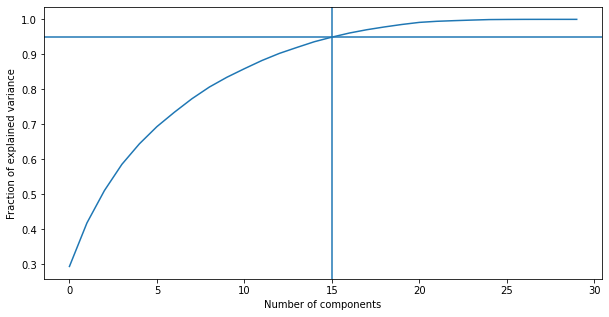

In [199]:
plt.figure(figsize=(10,5))
plt.plot(cum_exp_var)
plt.axhline(y=0.95)
plt.axvline(x=15)
plt.xlabel("Number of components")
plt.ylabel("Fraction of explained variance")


In [200]:
print("We can observe that less than 10 components explain nearly 95% variance of the data.So let's try PCA transformation into 10 components.")

We can observe that less than 10 components explain nearly 95% variance of the data.So let's try PCA transformation into 10 components.


In [201]:
pca=PCA(n_components=16)
X_pca=pd.DataFrame(pca.fit_transform(X_std),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'])

In [202]:
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-1.346471,3.615449,-0.642970,-0.332223,-1.178651,0.334457,0.270095,2.963563,0.755675,-0.975881,0.117140,-0.507892,0.989941,-1.248296,-0.037820,0.187368
1,-2.416186,2.437412,0.001678,0.597398,-0.949661,-0.529076,0.965691,2.427668,0.528255,-1.793795,0.242203,-1.345120,-0.355485,-0.602627,-0.209920,0.816860
2,-3.035930,1.592105,0.135315,0.963856,-0.946428,-0.541758,1.010689,2.316473,0.451088,-1.506488,0.316285,-1.628824,-1.022590,-0.353089,-0.653482,0.827812
3,-1.569118,2.794765,2.622561,-0.330068,-0.972950,-0.136326,2.060998,1.524630,-1.704795,0.890111,1.081963,-1.438372,-1.201568,-0.296421,-2.111160,-0.258099
4,1.251194,4.374976,2.139942,-0.840203,-1.470284,-0.080165,1.256584,1.404966,-1.067715,-0.684789,0.722353,0.224684,-0.271452,0.330521,-1.801874,-1.335912


In [147]:
print("We will now use these pricipal components to create a linear model instead of original features. Then we will compare its performance with original model.")

We will now use these pricipal components to create a linear model instead of original features. Then we will compare its performance with original model.


In [148]:
lg=LogisticRegression()
lg.fit(X_pca,y)

LogisticRegression()

In [149]:
y_pred=lg.predict(X_pca)

In [150]:
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

0.9180834621329211
[[1206   62]
 [  97  576]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1268
           1       0.90      0.86      0.88       673

    accuracy                           0.92      1941
   macro avg       0.91      0.90      0.91      1941
weighted avg       0.92      0.92      0.92      1941



In [151]:
print("We observe few miscalssifications in the PCA-Logistic Regression model and overall performance is reduced to 91.8%. We conclude tha simple Logistic  regression model is best suitable for classification of this data.")

We observe few miscalssifications in the PCA-Logistic Regression model and overall performance is reduced to 91.8%. We conclude tha simple Logistic  regression model is best suitable for classification of this data.


### Classification using PCA in combination with Random Forest

In [203]:
print("We will now use pricipal components (X_pca) extracted earlier to create a Random Forest model instead of original features. Then we will compare its performance with original model.")

We will now use pricipal components (X_pca) extracted earlier to create a Random Forest model instead of original features. Then we will compare its performance with original model.


In [204]:
param_dist={'n_estimators':sp_randint(50,250),'criterion':['entropy','gini'],'max_depth':sp_randint(2,25),'min_samples_split':sp_randint(2,50), 'min_samples_leaf':sp_randint(1,50)}
rsearch=RandomizedSearchCV(rfc,param_distributions=param_dist,cv=5,n_iter=50,scoring='roc_auc',random_state=42)
rsearch.fit(X_pca,y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=13,
                                                    min_samples_leaf=8,
                                                    min_samples_split=48,
                                                    n_estimators=84,
                                                    random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BAA1D560C8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BAA35619C8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BAA1D56208>,
                                        'n_es

In [205]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 54}

In [206]:
rfc=RandomForestClassifier(**rsearch.best_params_,random_state=42)
rfc.fit(X_pca,y)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       n_estimators=54, random_state=42)

In [207]:
y_pred=rfc.predict(X_pca)

In [208]:
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

0.9994848016486347
[[1268    0]
 [   1  672]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00       673

    accuracy                           1.00      1941
   macro avg       1.00      1.00      1.00      1941
weighted avg       1.00      1.00      1.00      1941



In [209]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y,y_pred))

0.9992570579494799


In [210]:
print("Random Forest based model fails to classify 11 records correctly leading to a lower accuracy of 99.4%.")

Random Forest based model fails to classify 11 records correctly leading to a lower accuracy of 99.4%.


In [211]:
print("We could successfully improve the performance of Random Forest based classification model using Principal Component Analysis. The improved model exhibitted 99.92% efficiency of classification with just one mistake.")

We could successfully improve the performance of Random Forest based classification model using Principal Component Analysis. The improved model exhibitted 99.92% efficiency of classification with just one mistake.
